In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3148300299864707444
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14405985589925203960
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [5]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, MaxPool2D, Flatten
from keras.optimizers import RMSprop
from keras import backend as K
import os 

# tf2.0使用tf.test.is_gpu_available()來確認機器是否在GPU模式下運行
tf.config.list_physical_devices('GPU')
import matplotlib.pyplot as plt
import numpy as np

5
60000 train samples
10000 test samples


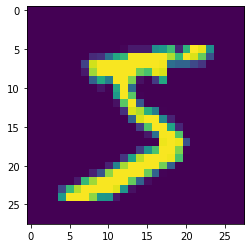

In [15]:
# the data, shuffled and split between train and test sets
(x_train_o, y_train), (x_test_o, y_test) = mnist.load_data()
plt.imshow(x_train_o[0])
print(y_train[0])

# 拉平
x_train = x_train_o.reshape(60000, 784)
x_test = x_test_o.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalization
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [16]:
# convert class vectors to binary class matrices
# 做一次 one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test_n = keras.utils.to_categorical(y_test)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
batch_size = 128
epochs = 100
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.33)

Epoch 1/100
315/315 [==============================] - 1s 4ms/step - loss: 1.1638 - accuracy: 0.6404 - val_loss: 0.3384 - val_accuracy: 0.9004
Epoch 2/100
315/315 [==============================] - 1s 3ms/step - loss: 0.3101 - accuracy: 0.9110 - val_loss: 0.2803 - val_accuracy: 0.9184
Epoch 3/100
315/315 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.9230 - val_loss: 0.2641 - val_accuracy: 0.9228
Epoch 4/100
315/315 [==============================] - 1s 3ms/step - loss: 0.2386 - accuracy: 0.9310 - val_loss: 0.2425 - val_accuracy: 0.9299
Epoch 5/100
315/315 [==============================] - 1s 3ms/step - loss: 0.2221 - accuracy: 0.9350 - val_loss: 0.2295 - val_accuracy: 0.9333
Epoch 6/100
315/315 [==============================] - 1s 3ms/step - loss: 0.1958 - accuracy: 0.9429 - val_loss: 0.2225 - val_accuracy: 0.9360
Epoch 7/100
315/315 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9470 - val_loss: 0.2115 - val_accuracy: 0.9404

In [20]:
result= model.evaluate(x_test, y_test_n)
print("test Acc:", result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.9557
test Acc: 0.9556999802589417


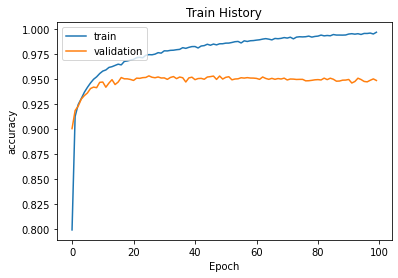

In [21]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  
show_train_history(history, 'accuracy', 'val_accuracy')  

	[Info] Making prediction to x_test


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 6 4 2]



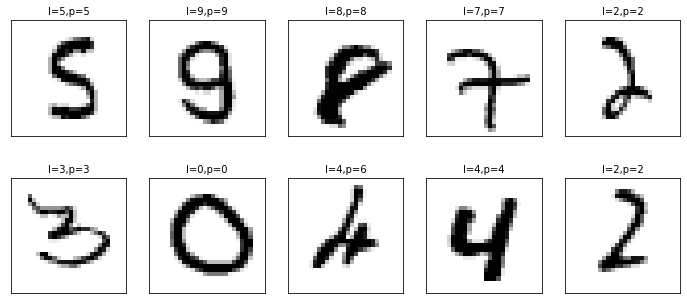

	[Info] Error analysis:
	At 247'th: 4 is with wrong prediction as 6!


In [22]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

def isDisplayAvl():  
    return True

print("\t[Info] Making prediction to x_test")  
prediction = model.predict_classes(x_test)   
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
if isDisplayAvl():
  plot_images_labels_predict(x_test_o, y_test, prediction, idx=240)  
  
print("\t[Info] Error analysis:")  
for i in range(240,250):  
  if prediction[i] != y_test[i]:  
    print("\tAt %d'th: %d is with wrong prediction as %d!" % (i, y_test[i], prediction[i]))  

## 使用ＣＮＮ


In [23]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 1, 28, 28)/255
X_test = X_test.reshape(10000, 1, 28, 28)/255
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [24]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=3, input_shape=(1, 28, 28), activation='relu', padding='same'))
model1.add(MaxPool2D(pool_size=2, data_format='channels_first'))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               57600     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 68,266
Trainable params: 68,266
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
629/629 [==============================] - 3s 4ms/step - loss: 0.6976 - accuracy: 0.8021 - val_loss: 0.1972 - val_accuracy: 0.9379
Epoch 2/5
629/629 [==============================] - 2s 4ms/step - loss: 0.1623 - accuracy: 0.9513 - val_loss: 0.1233 - val_accuracy: 0.9627
Epoch 3/5
629/629 [==============================] - 2s 4ms/step - loss: 0.1094 - accuracy: 0.9659 - val_loss: 0.1029 - val_accuracy: 0.9692
Epoch 4/5
629/629 [==============================] - 2s 3ms/step - loss: 0.0821 - accuracy: 0.9744 - val_loss: 0.0919 - val_accuracy: 0.9717
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.9780
Test:
Loss: 0.0681164339184761
Accuracy: 0.9779999852180481


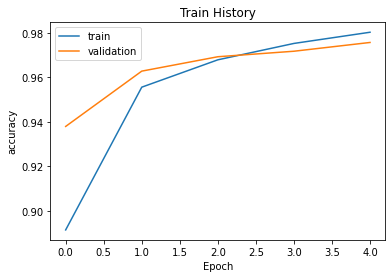

In [25]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model1.fit(X_train, Y_train, epochs=5, batch_size=64, verbose=1, validation_split=0.33)

loss, accuracy = model1.evaluate(X_test, Y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))

show_train_history(h, 'accuracy', 'val_accuracy')  

conv2d_1
32


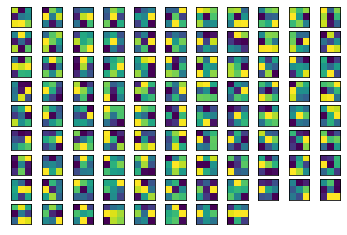

In [26]:
# Iterate thru all the layers of the model
# https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
for layer in model1.layers:
  if 'conv' in layer.name:
      weights, bias= layer.get_weights()
      print(layer.name)
      
      #normalize filter values between  0 and 1 for visualization
      f_min, f_max = weights.min(), weights.max()
      # print(f_max, f_min)
      filters = (weights - f_min) / (f_max - f_min)  
      print(filters.shape[3])
      filter_cnt=1
      
      #plotting all the filters
      for i in range(filters.shape[3]):
          #get the filters
          filt=filters[:,:,:, i]
          #plotting each of the channel, color image RGB channels
          for j in range(filters.shape[0]):
              ax= plt.subplot(9, 11, filter_cnt)
              ax.set_xticks([])
              ax.set_yticks([])
              plt.imshow(filt[:,:, j])
              filter_cnt+=1
      plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 14, 64)         9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               57600     
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

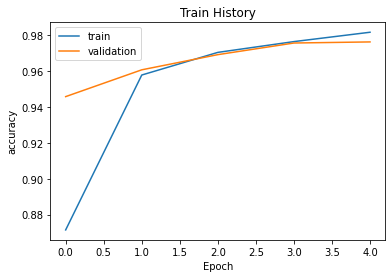

In [47]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=3, input_shape=(1, 28, 28), activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2, data_format='channels_first'))
model2.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2, data_format='channels_first'))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h2 = model2.fit(X_train, Y_train, epochs=5, batch_size=64, verbose=1, validation_split=0.33)

loss, accuracy = model1.evaluate(X_test, Y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))

show_train_history(h2, 'accuracy', 'val_accuracy') 

conv2d_2
32


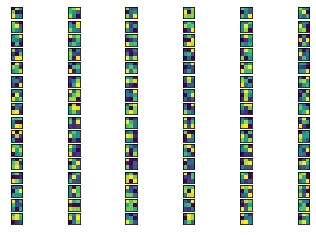

conv2d_3
64


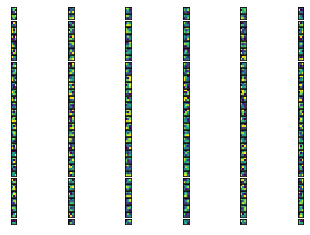

In [64]:
# Iterate thru all the layers of the model
# https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
for layer in model2.layers:
  if 'conv' in layer.name:
      weights, bias= layer.get_weights()
      print(layer.name)
      
      #normalize filter values between  0 and 1 for visualization
      f_min, f_max = weights.min(), weights.max()
      # print(f_max, f_min)
      filters = (weights - f_min) / (f_max - f_min)  
      print(filters.shape[3])
      filter_cnt=1
      
      #plotting all the filters
      for i in range(filters.shape[3]):
          #get the filters
          filt=filters[:,:,:, i]
          #plotting each of the channel, color image RGB channels
          for j in range(filters.shape[0]):
            ax= plt.subplot(filters.shape[3]/2, filters.shape[0]*2, filter_cnt)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(filt[:,:, j])
            filter_cnt+=1
      plt.show()

### Image filtering
當我們需要強化影像中的某些特徵並消除其他不想要的特徵，所採用的方法便是使用特定 kernel，針對整張進行捲積（convolution）操作。

舉例來說，模糊（blur）、邊緣偵測（edge detection）、邊緣強化（edge enhancement）、噪點去除（noise removal）等，都是使用 kernel 針對影像進行捲積的結果。

執行 convolution 後，會發現有一個很明顯的特性，就是輸出的圖片尺寸會比原來的小一圈，一般我們會採取四種方式來處理此特性：

- Ignore the boundary pixels：忽略消失的邊界影像，直接使用輸出的圖片。
- Zero padding：先在原圖周圍填補一圈為 0 的像素，再進行捲積，使輸出的圖片尺寸不變。
- Replicate border：直接複製原圖最邊界的 pixels 到輸出的圖周圍，例如：aaaaaa 🡨 abcdefgh 🡪 hhhhhhh
- Reflect border：與 Replicate border 類似，但複製的方式是對稱方式 copy，例如：fedcba 🡨 abcdefgh 🡪 hgfedcb

from: https://makerpro.cc/2019/06/the-convolution-of-opencv/

In [1]:
!pip install opencv-python

In [2]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-cp37-none-any.whl size=25862 sha256=773525227acf4fe383c8f086d88876da33db4d5ef16f379e840b33023d616253
  Stored in directory: C:\Users\aikawa\AppData\Local\pip\Cache\wheels\db\23\45\fc7424906880ffa9577a2a428b961f2b79e0e21d9f71e7e6bc
Successfully built imutils


[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


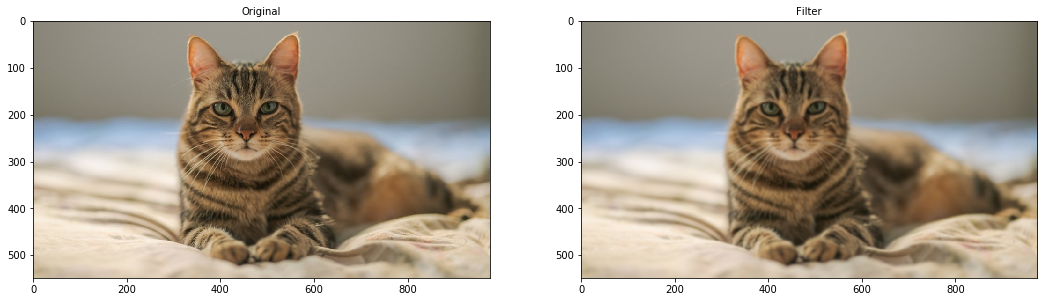

In [15]:
# blur
import numpy as np
import cv2
import imutils
import sys
import matplotlib.pyplot as plt

imageName = "cat.jpg"
image = cv2.imread(imageName)
image = image[:,:,::-1]  # bgr -->rbb


# kernel size = 5x5
kernel_size = 5

# 使用numpy建立 5*5且值為1/(5**2)的矩陣作為kernel，所有值皆為0.04的5x5矩陣
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / kernel_size**2
print (kernel)

# 使用cv2.filter2D進行convolute，
result = cv2.filter2D(image, -1, dst=-1, kernel=kernel, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
plt.figure(figsize=(18,10)) 
ax = plt.subplot(1, 2, 1)  
ax.imshow(image)  
ax.set_title("Original", fontsize=10)  
ax = plt.subplot(1, 2, 2)  
ax.imshow(result) 
ax.set_title("Filter", fontsize=10)  

plt.show() 

### edge detection
#### Sobel filters
以下 kernel 的九個值全部加起來為 0（-1×8+8=0）？

也就是說，當影像區域的色彩一致時（可能為背景），kernel 計算出的平均值為 0，代表輸出值（kernel anchor）等於 0（黑色）

而倘若影像區域的中間顏色比周圍亮（代表可能為物體的交界處），此時 kernel 中間的數值 8 便會強化加大該交界值而變得更亮，-1 則淡化了周圍非物件邊緣的像素強度，使得整體算出的輸出值（kernel anchor）更大。

這就是大名鼎鼎的 **Sobel filter**，最早是由美國計算機科學家艾爾文·索伯（Irwin Sobel）及蓋瑞·費德曼（Gary Feldman）於 1968 年在史丹佛大學的人工智慧實驗室（SAIL）所提出，專門用於邊緣檢測（Edge Detector），而為了表揚他們的貢獻，才用他們的名字命名。

旋轉後可形成四種 Sobel filters：left、right、top、bottom，分別用於檢測水平與垂直的變化。

- 垂直
```
np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
```

- 水平
```
np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
```
#### Laplacian Edge Detector
另外還有一種相當知名的邊緣檢測稱為 Laplacian Edge Detector，不同於 Sobel 需要至少兩種 kernels 來分別檢測水平與垂直邊緣，它僅用一種 kernel 就可以偵測兩種方向的邊緣
```
np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
```

*不過 Laplacian 有個缺點，是對於噪點較為敏感，因此若能在進行 Laplacian 前先作模糊化處理，效果會更好

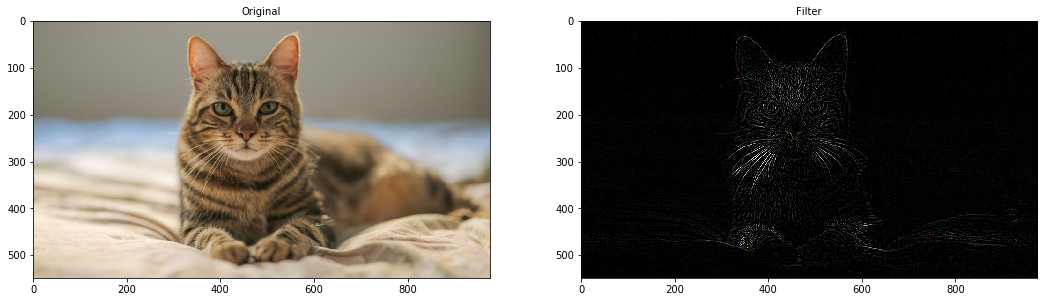

In [17]:
# edge detection
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# 使用cv2.filter2D進行convolute，
result = cv2.filter2D(image, -1, dst=-1, kernel=kernel, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
plt.figure(figsize=(18,10)) 
ax = plt.subplot(1, 2, 1)  
ax.imshow(image)  
ax.set_title("Original", fontsize=10)  
ax = plt.subplot(1, 2, 2)  
ax.imshow(result) 
ax.set_title("Filter", fontsize=10)  

plt.show() 